# Space2Stats Client - UI Widgets Demo

In [11]:
import pandas as pd
import requests
import ipywidgets as widgets
from IPython.display import display
from typing import List
from space2stats_client import Space2StatsClient
from space2stats_client.widgets import CrossSectionFieldSelector, TimeSeriesFieldSelector
import geopandas as gpd
from shapely import from_geojson
from shapely.geometry import shape
import matplotlib.pyplot as plt
import json
from plotnine import (
    ggplot,
    aes,
    geom_map,
    coord_fixed,
    facet_wrap,
    scale_fill_distiller,
    element_rect,
    theme_void,
    theme,
)

# Init Client
client = Space2StatsClient()

# Fetch an AOI

<Axes: >

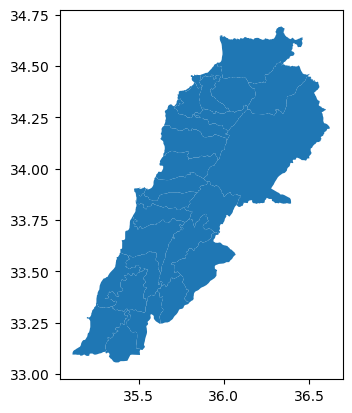

In [2]:
# Fetch an AOI
ISO3 = "LBN" # Lebanon
ADM = "ADM2" # Level 2 administrative boundaries
adm_boundaries = client.fetch_admin_boundaries(ISO3, ADM)
adm_boundaries.plot()

# Use Cross-Section Field Selector to Select Relevent Fields

In [3]:
# Display the Cross-Section Field Selector widget
# In this example we are selecting all of the NTL data
csfs = CrossSectionFieldSelector(client)
csfs.display()

# Fetch Cross-Section Data from the API

In [9]:
# Get the selected fields
selected_fields = csfs.get_selected_fields()

# Get available topics/datasets
df = client.get_summary(
    gdf=adm_boundaries,
    spatial_join_method="centroid",
    fields=selected_fields,
    geometry="polygon"
)

# Convert to gdf
df["geometry"] = df["geometry"].apply(lambda geom: from_geojson(geom))
gdf = gpd.GeoDataFrame(df, geometry="geometry", crs="EPSG:4326")
gdf.head()

Fetching data for boundary 1 of 26...
Fetching data for boundary 2 of 26...
Fetching data for boundary 3 of 26...
Fetching data for boundary 4 of 26...
Fetching data for boundary 5 of 26...
Fetching data for boundary 6 of 26...
Fetching data for boundary 7 of 26...
Fetching data for boundary 8 of 26...
Fetching data for boundary 9 of 26...
Fetching data for boundary 10 of 26...
Fetching data for boundary 11 of 26...
Fetching data for boundary 12 of 26...
Fetching data for boundary 13 of 26...
Fetching data for boundary 14 of 26...
Fetching data for boundary 15 of 26...
Fetching data for boundary 16 of 26...
Fetching data for boundary 17 of 26...
Fetching data for boundary 18 of 26...
Fetching data for boundary 19 of 26...
Fetching data for boundary 20 of 26...
Fetching data for boundary 21 of 26...
Fetching data for boundary 22 of 26...
Fetching data for boundary 23 of 26...
Fetching data for boundary 24 of 26...
Fetching data for boundary 25 of 26...
Fetching data for boundary 26 of 2

,shapeName,shapeISO,shapeID,shapeGroup,shapeType,index_gdf,index_h3,hex_id,geometry,sum_viirs_ntl_2012,...,sum_viirs_ntl_2015,sum_viirs_ntl_2016,sum_viirs_ntl_2017,sum_viirs_ntl_2018,sum_viirs_ntl_2019,sum_viirs_ntl_2020,sum_viirs_ntl_2021,sum_viirs_ntl_2022,sum_viirs_ntl_2023,sum_viirs_ntl_2024
0,Bent Jbail,,6925839B74640193916916,LBN,ADM2,0,0,862db1887ffffff,"POLYGON ((35.42203 33.31277, 35.40269 33.28103...",553.849976,...,472.389984,468.510010,590.809998,583.760010,640.440002,631.760010,561.890015,357.530029,445.319977,287.669983
1,Bent Jbail,,6925839B74640193916916,LBN,ADM2,0,1,862db1c2fffffff,"POLYGON ((35.37138 33.09302, 35.3521 33.06124,...",435.399994,...,501.020020,516.200012,683.869995,605.319946,634.660034,600.270020,585.359985,499.360016,637.059998,465.840027
2,Bent Jbail,,6925839B74640193916916,LBN,ADM2,0,2,862db1c67ffffff,"POLYGON ((35.42929 33.1883, 35.40998 33.15655,...",609.630005,...,739.010010,806.690002,947.750000,925.270020,963.229980,822.190002,684.469971,317.239990,621.179993,409.529999
3,Bent Jbail,,6925839B74640193916916,LBN,ADM2,0,3,862db1c77ffffff,"POLYGON ((35.43291 33.12605, 35.41361 33.09429...",834.940002,...,1293.869995,1256.030029,1366.219971,1431.680054,1241.159912,1068.500000,1026.969971,541.910034,1068.199951,575.159973
4,Bent Jbail,,6925839B74640193916916,LBN,ADM2,0,4,862db1d47ffffff,"POLYGON ((35.30246 33.18448, 35.28318 33.1527,...",562.679993,...,641.229980,630.179993,789.910034,674.929993,565.699951,564.429993,517.429993,359.380005,510.619995,324.180023


# Visualize the Cross-Section Data

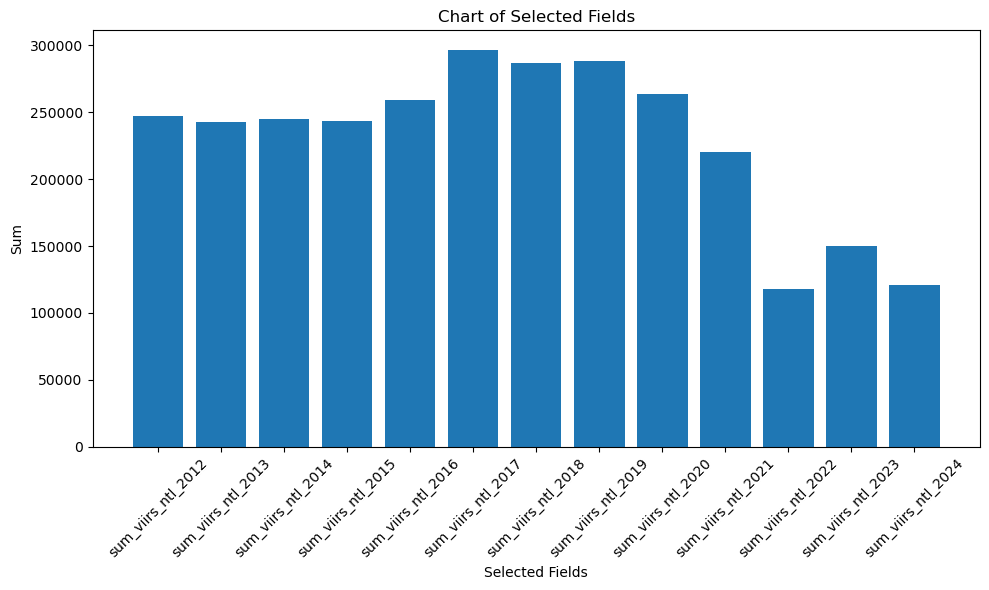

In [12]:
# Sum the values for each selected field (if numeric)
summary_data = gdf[selected_fields].sum()

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(summary_data.index, summary_data.values)
plt.xlabel('Selected Fields')
plt.ylabel('Sum' if 'summary_data' in locals() else 'Count')
plt.title('Chart of Selected Fields')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [13]:
# Now create your risk map
nlt_2012 = gdf.explore(
    column="sum_viirs_ntl_2012",
    tooltip=[],
    cmap="OrRd",
    legend=True,
    scheme="quantiles",
    legend_kwds=dict(colorbar=True, caption="sum_viirs_ntl_2012", interval=False),
    style_kwds=dict(weight=0.5, fillOpacity=0.8),
    name="sum_viirs_ntl_2012",
)

nlt_2012

# Use Time Series Field Selector to Select Relevent Fields

In [27]:
# Display the Time Sereis Field Selector widget
# NOTE: In this example we are using SPI data and selecting a 12 month period
tsfs = TimeSeriesFieldSelector(client)
tsfs.display()

Loading timeseries fields from API...
✓ 1 timeseries fields loaded from API


# Fetch Time Series Data from the API

In [31]:
selections = tsfs.get_selections()
selected_fields = selections['fields']
selected_start_date = selections['time_period']['start_date'].isoformat()
selected_end_date = selections['time_period']['end_date'].isoformat()

result_df = client.get_timeseries(
            gdf=adm_boundaries,
            spatial_join_method="centroid",
            fields=selected_fields,
            start_date=selected_start_date,
            end_date=selected_end_date,
            geometry= "polygon"
        )

Fetching data for boundary 1 of 26...
Fetching data for boundary 2 of 26...
Fetching data for boundary 3 of 26...
Fetching data for boundary 4 of 26...
Fetching data for boundary 5 of 26...
Fetching data for boundary 6 of 26...
Fetching data for boundary 7 of 26...
Fetching data for boundary 8 of 26...
Fetching data for boundary 9 of 26...
Fetching data for boundary 10 of 26...
Fetching data for boundary 11 of 26...
Fetching data for boundary 12 of 26...
Fetching data for boundary 13 of 26...
Fetching data for boundary 14 of 26...
Fetching data for boundary 15 of 26...
Fetching data for boundary 16 of 26...
Fetching data for boundary 17 of 26...
Fetching data for boundary 18 of 26...
Fetching data for boundary 19 of 26...
Fetching data for boundary 20 of 26...
Fetching data for boundary 21 of 26...
Fetching data for boundary 22 of 26...
Fetching data for boundary 23 of 26...
Fetching data for boundary 24 of 26...
Fetching data for boundary 25 of 26...
Fetching data for boundary 26 of 2

# Visualize the Time Series Data

In [32]:
# Convert date strings to datetime objects
if 'date' in result_df.columns and not pd.api.types.is_datetime64_any_dtype(result_df['date']):
    result_df['date'] = pd.to_datetime(result_df['date'])

result_df['year'] = result_df['date'].dt.year
result_df.head(2)

,hex_id,date,spi,geometry,area_id,year
0,862db1887ffffff,2024-01-01 00:00:00+00:00,0.685024,"{""type"":""Polygon"",""coordinates"":[[[35.42202628...",0,2024
1,862db1887ffffff,2024-02-01 00:00:00+00:00,0.933760,"{""type"":""Polygon"",""coordinates"":[[[35.42202628...",0,2024


In [33]:
# Convert geometry to shapely objects to convert the df to gdf
if isinstance(result_df["geometry"].iloc[0], str):
    result_df["geometry"] = result_df["geometry"].apply(json.loads)
result_df["geometry"] = result_df["geometry"].apply(shape)
gdf = gpd.GeoDataFrame(result_df, geometry="geometry", crs="EPSG:4326")
gdf['ym'] = gdf['date'].dt.strftime('%Y-%m')

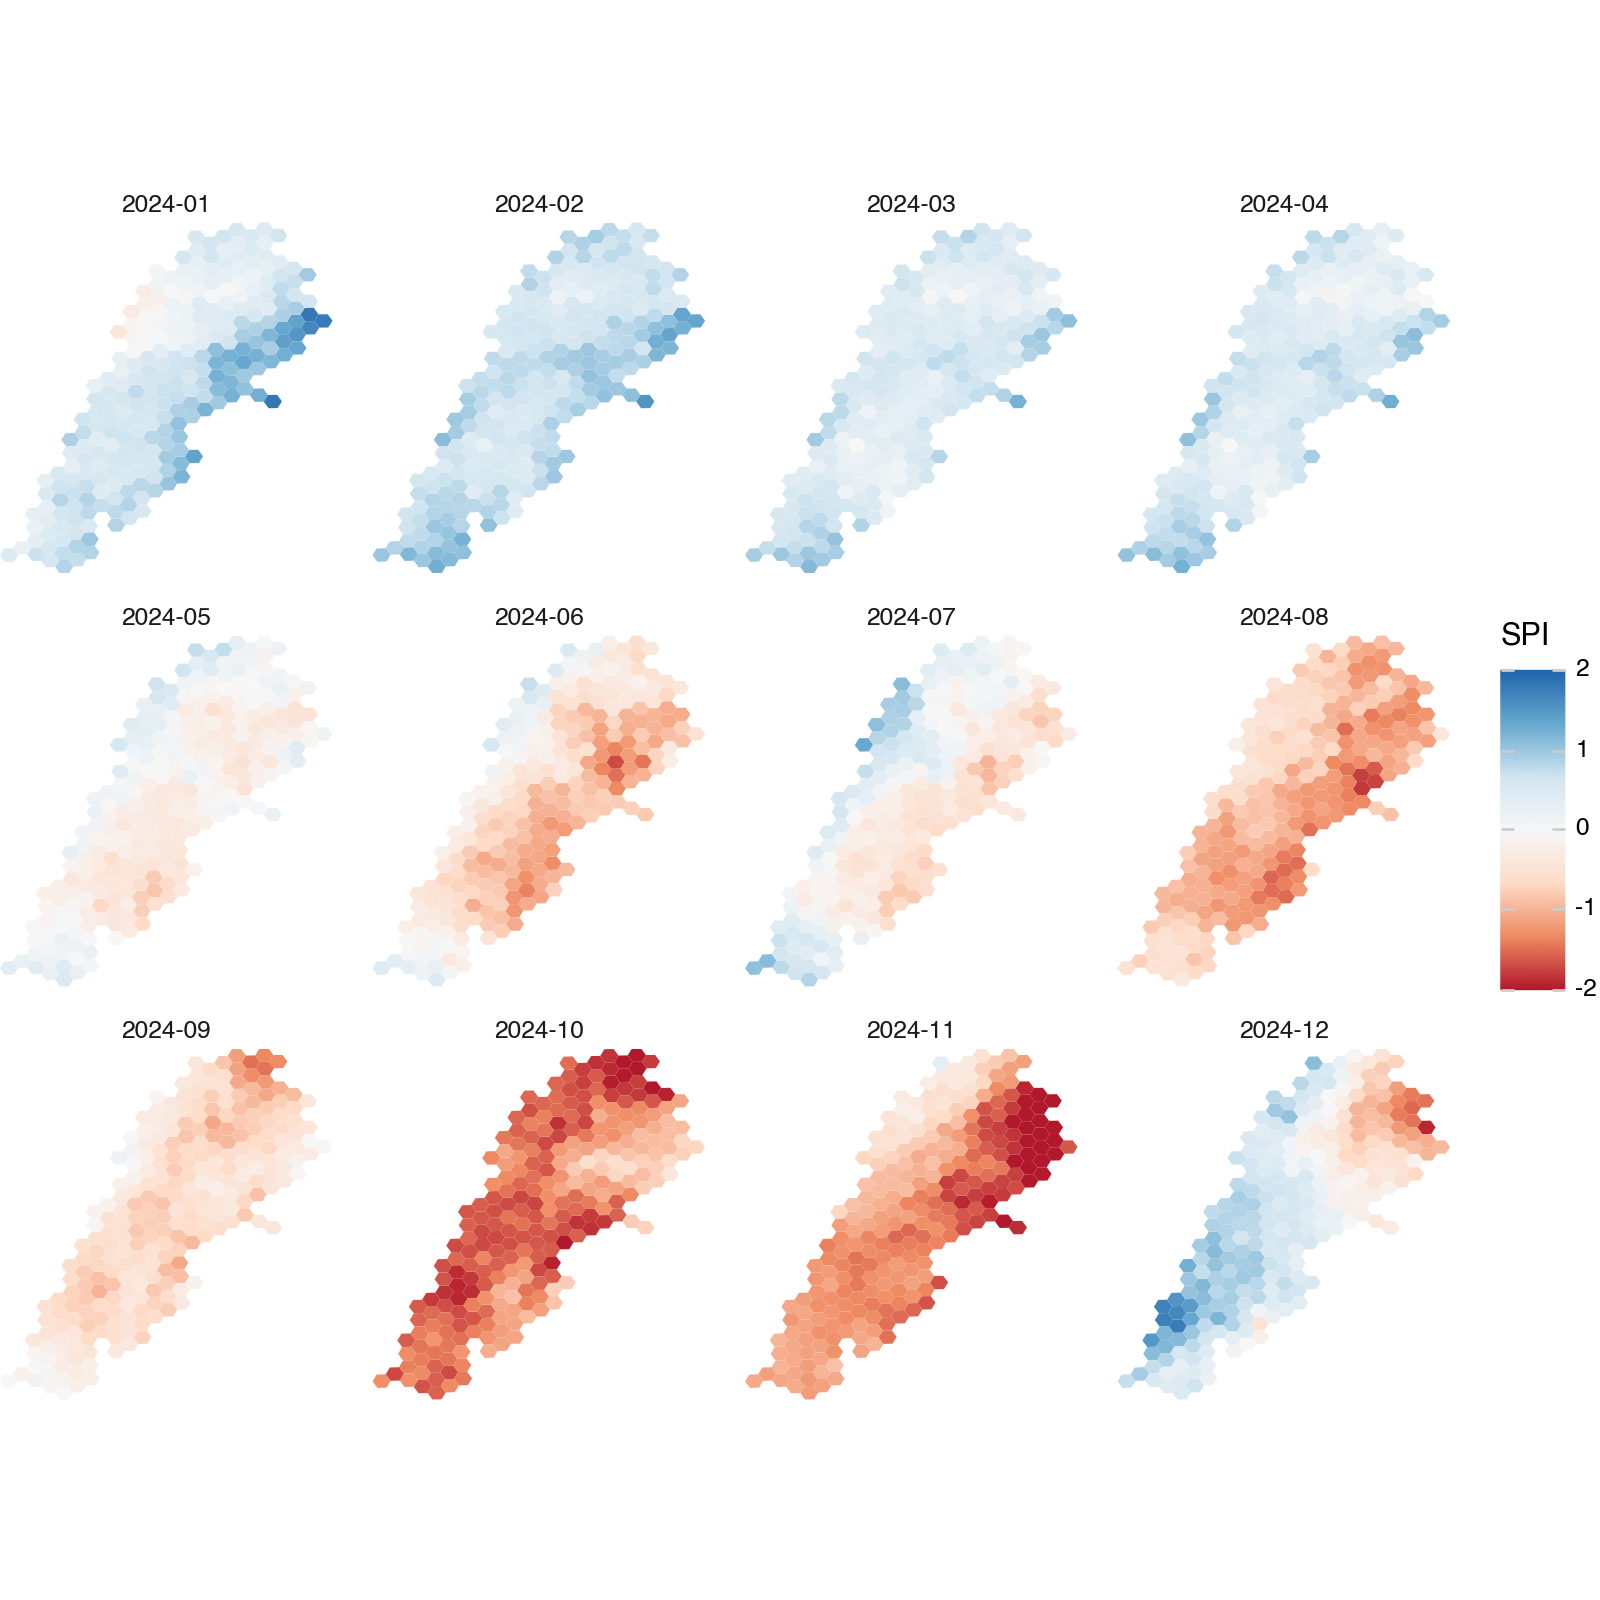

In [34]:
(
    ggplot(gdf)
    + geom_map(aes(fill="spi"), size=0)
    + scale_fill_distiller(type="div", palette="RdBu", name="SPI", limits=(-2, 2))
    + facet_wrap(
        "ym",
        ncol=4,
    )
    + coord_fixed(expand=False)
    + theme_void()
    + theme(
        figure_size=(8, 8),
        plot_background=element_rect(fill="white"),
        panel_spacing=0.025
    )
)